# 练习——西瓜数据集

![waterlameon](image/waterlameon.png)

数据集来源：《机器学习》周志华   
数据集位置：[datesets/西瓜数据集.csv](datesets/西瓜数据集.csv)  
请完善，并丰富以下分析过程。

## 1.读取数据

In [1]:
import pandas as pd
df = pd.read_csv("数据/西瓜数据集.csv", index_col=0)
df

,色泽,根蒂,敲声,纹理,脐部,触感,密度,含糖率,好瓜
编号,,,,,,,,,
1,青绿,蜷缩,浊响,清晰,凹陷,硬滑,0.697,0.460,是
2,乌黑,蜷缩,沉闷,清晰,凹陷,硬滑,0.774,0.376,是
3,乌黑,蜷缩,浊响,清晰,凹陷,硬滑,0.634,0.264,是
4,青绿,蜷缩,沉闷,清晰,凹陷,硬滑,0.608,0.318,是
5,浅白,蜷缩,浊响,清晰,凹陷,硬滑,0.556,0.215,是
6,青绿,稍蜷,浊响,清晰,稍凹,软粘,0.403,0.237,是
7,乌黑,稍蜷,浊响,稍糊,稍凹,软粘,0.481,0.149,是
8,乌黑,稍蜷,浊响,清晰,稍凹,硬滑,0.437,0.211,是
9,乌黑,稍蜷,沉闷,稍糊,稍凹,硬滑,0.666,0.091,否


## 2.编码变量

由于上面的数据中包含了中文汉字，所以需要对数据进一步处理

```python
属性：
色泽 1-3代表 浅白 青绿 乌黑 根蒂 1-3代表 稍蜷 蜷缩 硬挺
敲声 1-3代表 清脆 浊响 沉闷 纹理 1-3代表 清晰 稍糊 模糊
脐部 1-3代表 平坦 稍凹 凹陷 触感 1-2代表 硬滑 软粘
标签：
好瓜 1代表 是 0 代表 不是
```

In [2]:
df['色泽']=df['色泽'].map({'浅白':1,'青绿':2,'乌黑':3})
df['根蒂']=df['根蒂'].map({'稍蜷':1,'蜷缩':2,'硬挺':3})
df['敲声']=df['敲声'].map({'清脆':1,'浊响':2,'沉闷':3})
df['纹理']=df['纹理'].map({'清晰':1,'稍糊':2,'模糊':3})
df['脐部']=df['脐部'].map({'平坦':1,'稍凹':2,'凹陷':3})
import numpy as np
df['触感'] = np.where(df['触感']=="硬滑",1,2)
df['好瓜'] = np.where(df['好瓜']=="是",1,0)

In [3]:
df

,色泽,根蒂,敲声,纹理,脐部,触感,密度,含糖率,好瓜
编号,,,,,,,,,
1,2,2,2,1,3,1,0.697,0.460,1
2,3,2,3,1,3,1,0.774,0.376,1
3,3,2,2,1,3,1,0.634,0.264,1
4,2,2,3,1,3,1,0.608,0.318,1
5,1,2,2,1,3,1,0.556,0.215,1
6,2,1,2,1,2,2,0.403,0.237,1
7,3,1,2,2,2,2,0.481,0.149,1
8,3,1,2,1,2,1,0.437,0.211,1
9,3,1,3,2,2,1,0.666,0.091,0


## 3.划分数据集为训练集和测试集

由于西瓜数据集样本比较少，所以不划分数据集，将所有的西瓜数据用来训练模型

In [4]:
Xtrain = df[['色泽', '根蒂', '敲声', '纹理', '脐部', '触感']]
Ytrain = df.iloc[:,-1]

如果需要划分数据集，比如训练集和测试集划分成6:4,使用以下命令：
```python
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.4, random_state = 123)
```


In [5]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(Xtrain, Ytrain, test_size = 0.4, random_state = 123)

In [6]:
train_X

,色泽,根蒂,敲声,纹理,脐部,触感
编号,,,,,,
11,1,3,1,3,1,1
12,1,2,2,3,1,2
4,2,2,3,1,3,1
2,3,2,3,1,3,1
7,3,1,2,2,2,2
16,1,2,2,3,1,1
13,2,1,2,2,3,1
3,3,2,2,1,3,1
15,3,1,2,1,2,2


In [7]:
test_X

,色泽,根蒂,敲声,纹理,脐部,触感
编号,,,,,,
5,1,2,2,1,3,1
10,2,3,1,1,1,2
17,2,2,3,2,2,1
9,3,1,3,2,2,1
6,2,1,2,1,2,2
8,3,1,2,1,2,1
1,2,2,2,1,3,1


## 4. 建立和训练决策树模型

In [8]:
# 调用sklearn内置的决策树的库
from sklearn import tree
# 利用信息熵构建决策树模型
clf = tree.DecisionTreeClassifier(criterion="entropy")
clf = clf.fit(train_X,train_y)

In [9]:
clf.predict(test_X)

array([0, 1, 1, 1, 0, 0, 1])

In [10]:
test_y

编号
5     1
10    0
17    0
9     0
6     1
8     1
1     1
Name: 好瓜, dtype: int64

## 5.绘制模型结果

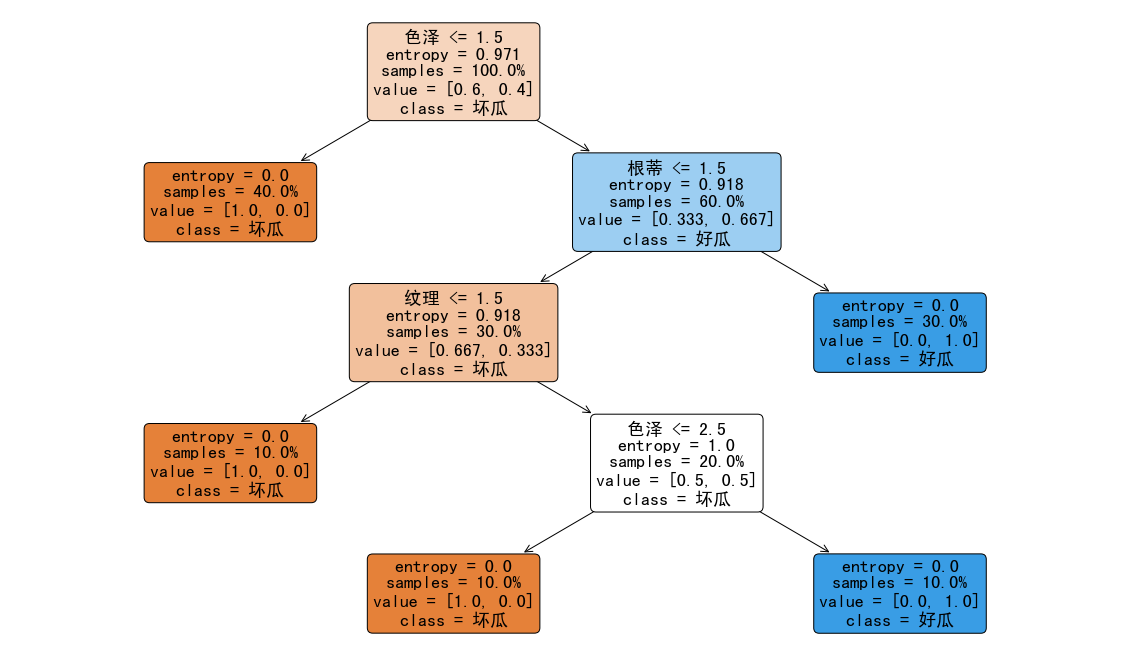

In [11]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = 'SimHei'  # 设置字体为SimHei
plt.rcParams['axes.unicode_minus'] = False  # 解决负号“-”显示异常

from sklearn.tree import plot_tree
plt.figure(figsize = (20,12))
feature_names = ["色泽","根蒂","敲声","纹理","脐部","触感","密度","含糖率"]
plot_tree(clf,
          max_depth=5,
          feature_names=feature_names,
          class_names=['坏瓜','好瓜'],
          filled=True,
          rounded=True,
          proportion=True,
          fontsize=18)
plt.show()